<a href="https://colab.research.google.com/github/Raoina/Spectra-2-Image/blob/main/notebooks/Image_Transformation/%2002_GAF_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Si-Ware Dataset**

In [1]:
file_path = '/content/drive/MyDrive/spectra_test.csv'

In [2]:
import pandas as pd

df = pd.read_csv(file_path)

df.head()

,3921.568654,3935.18188,3948.795106,3962.408332,3976.021558,3989.634784,4003.24801,4016.861236,4030.474462,4044.087688,...,7284.03545,7297.648676,7311.261902,7324.875128,7338.488353,7352.101579,7365.714805,7379.328031,7392.941257,7406.554483
0,7.209724,7.202985,7.208119,7.222696,7.258278,7.331684,7.448954,7.617220,7.838484,8.113857,...,38.932550,39.595226,40.219869,40.823632,41.396258,41.917661,42.375544,42.786740,43.177964,43.578847
1,6.802202,6.786788,6.780681,6.782455,6.805124,6.866235,6.970652,7.124253,7.327331,7.580233,...,37.986222,38.679829,39.260441,39.754916,40.186044,40.582608,40.971723,41.394751,41.882680,42.451031
2,7.890556,7.886369,7.891463,7.899888,7.926916,7.996553,8.118622,8.304178,8.555945,8.874496,...,40.293261,40.944037,41.545459,42.118273,42.643149,43.082208,43.410055,43.651383,43.865255,44.137235
3,7.741266,7.740978,7.762811,7.796629,7.849472,7.935991,8.058430,8.225489,8.443056,8.720983,...,39.061605,39.623743,40.143299,40.666132,41.198445,41.715807,42.192246,42.641311,43.095348,43.595889
4,6.642168,6.647871,6.665882,6.686998,6.720952,6.786233,6.889498,7.039912,7.239455,7.489099,...,37.307641,38.113560,38.788978,39.330331,39.747478,40.085455,40.398576,40.749179,41.170187,41.662778


In [4]:
# # Select columns that contain numeric names, excluding 'Sample ID'
# spectral_cols = [col for col in df.columns if col != 'Sample ID' and col.replace('.', '', 1).isdigit()]
# spectra_df = df[spectral_cols]

# # Display the head of the new dataframe
# display(spectra_df.head())

,3921.568654,3935.185205,3948.801765,3962.418316,3976.034876,3989.651427,4003.267987,4016.884537,4030.501097,4044.117648,...,7284.857826,7298.474386,7312.090937,7325.707497,7339.324048,7352.940608,7366.557159,7380.173719,7393.790269,7407.406829
0,7.729080,7.622415,7.546208,7.481664,7.423155,7.377601,7.358989,7.381517,7.454154,7.577913,...,34.616084,35.288379,35.845357,36.327769,36.777222,37.228529,37.695179,38.173677,38.652607,39.125314
1,9.720940,9.584006,9.485654,9.401768,9.326291,9.270802,9.256881,9.306069,9.431605,9.634163,...,42.449703,43.100897,43.648566,44.136925,44.609373,45.097435,45.608556,46.131176,46.646221,47.142563
2,7.551404,7.444440,7.367629,7.300275,7.237015,7.186719,7.165871,7.190576,7.270485,7.406037,...,34.907780,35.560699,36.103651,36.578961,37.026430,37.475247,37.932452,38.389652,38.834516,39.264430
3,6.526686,6.434280,6.366056,6.301643,6.235700,6.175937,6.136361,6.129914,6.163474,6.236180,...,27.640183,28.252847,28.764077,29.212927,29.634762,30.056096,30.485576,30.919745,31.351121,31.777759
4,6.840954,6.757292,6.697071,6.637614,6.573048,6.512227,6.471038,6.464014,6.498781,6.574416,...,28.069196,28.715024,29.254844,29.724470,30.160514,30.594707,31.040131,31.494608,31.948344,32.395361


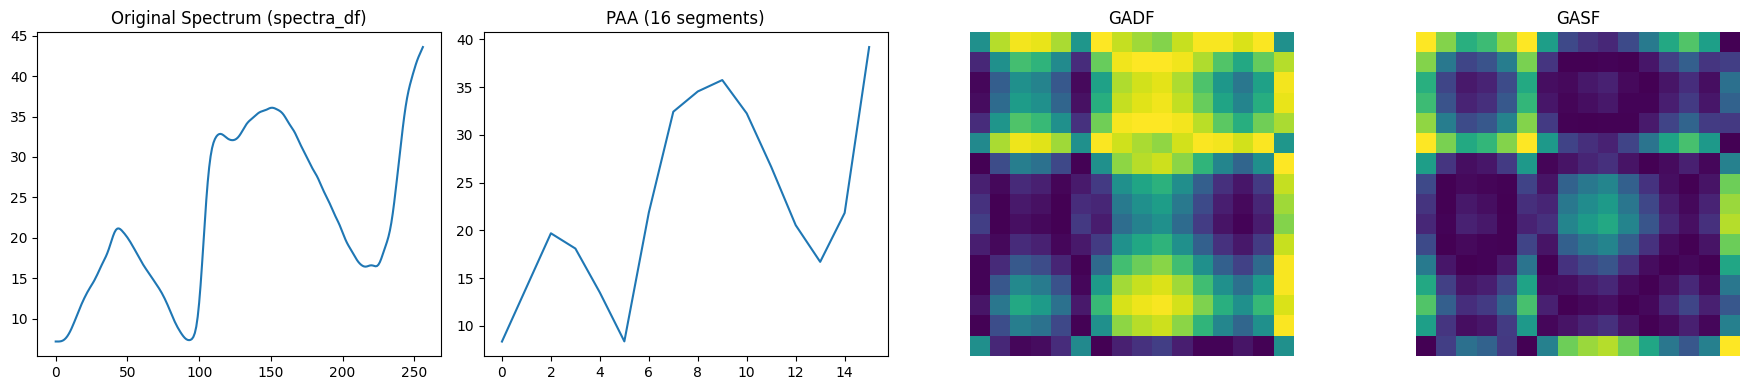

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def paa_distribute(series, segments):
    n = len(series)
    base = n // segments
    rem = n % segments
    res = []
    idx = 0
    for i in range(segments):
        seg_len = base + (1 if i < rem else 0)
        seg = series[idx: idx+seg_len]
        res.append(seg.mean())
        idx += seg_len
    return np.array(res)

# ---------- GADF ----------
def gadf_transform(paa_series):
    # 1 Normalize to [0,1]
    mn, mx = paa_series.min(), paa_series.max()
    if mx == mn:
        scaled_01 = np.zeros_like(paa_series)
    else:
        scaled_01 = (paa_series - mn) / (mx - mn)

    # 2 Convert to [-1,1]
    scaled = 2.0 * scaled_01 - 1.0
    scaled = np.clip(scaled, -1.0, 1.0)

    # 3 Compute angles and GADF
    phi = np.arccos(scaled)
    phi_sub = np.subtract.outer(phi, phi)
    GADF = np.sin(phi_sub)
    return GADF

# ---------- GASF ----------
def gasf_transform(paa_series):
    # 1 Normalize to [0,1]
    mn, mx = paa_series.min(), paa_series.max()
    if mx == mn:
        scaled_01 = np.zeros_like(paa_series)
    else:
        scaled_01 = (paa_series - mn) / (mx - mn)

    # 2 Convert to [-1,1]
    scaled = 2.0 * scaled_01 - 1.0
    scaled = np.clip(scaled, -1.0, 1.0)

    # 3 Compute angles and GASF
    phi = np.arccos(scaled)
    phi_add = np.add.outer(phi, phi)
    GASF = np.cos(phi_add)
    return GASF

segments = 16

# Use the first row of spectra_df
row = df.iloc[0]
spectrum = row.values.astype(float)

# PAA
paa_series = paa_distribute(spectrum, segments)

# GADF and GASF
gadf = gadf_transform(paa_series)
gasf = gasf_transform(paa_series)

fig, axs = plt.subplots(1, 4, figsize=(18, 4))

axs[0].plot(spectrum)
axs[0].set_title("Original Spectrum (spectra_df)")

axs[1].plot(paa_series)
axs[1].set_title(f"PAA ({segments} segments)")

# GADF
im2 = axs[2].imshow(gadf, cmap="viridis", origin="upper", vmin=-1, vmax=1)
axs[2].set_title("GADF")
axs[2].axis("off")

# GASF
im3 = axs[3].imshow(gasf, cmap="viridis", origin="upper", vmin=-1, vmax=1)
axs[3].set_title("GASF")
axs[3].axis("off")

plt.tight_layout()
plt.show()

# GASF 16 *16

In [14]:
import numpy as np
import os
from matplotlib import cm
from PIL import Image
import gc

# -------------------------------
# 1. Setup output directory
# -------------------------------
gasf_dir_moi = "GASF_test_16"
os.makedirs(gasf_dir_moi, exist_ok=True)

# -------------------------------
# 2. PAA - Piecewise Aggregate Approximation
# This reduces the length of the spectral sequence while
# preserving its main trends. The remainder (if the series
# cannot be divided exactly) is distributed across the first
# few segments.
# -------------------------------
def paa_distribute(series, segments):
    n = len(series)
    base = n // segments
    rem = n % segments
    res = []
    idx = 0
    for i in range(segments):
        seg_len = base + (1 if i < rem else 0)
        seg = series[idx: idx + seg_len]
        res.append(seg.mean())
        idx += seg_len
    return np.array(res)

# -------------------------------
# 3. GASF Transform
# Steps based on the paper:
#  a) Normalize PAA series to [0,1] first (for consistency across samples)
#  b) Convert normalized series to [-1,1] before arccos
#  c) Compute phi = arccos(scaled)
#  d) Compute GASF = cos(phi_i + phi_j)
# -------------------------------
def gasf_transform(paa_series):
    # Step a: normalize to [0,1]
    mn, mx = paa_series.min(), paa_series.max()
    if mx == mn:
        norm_01 = np.zeros_like(paa_series)
    else:
        norm_01 = (paa_series - mn) / (mx - mn)

    # Step b: convert to [-1,1] for arccos
    scaled = norm_01 * 2.0 - 1.0
    scaled = np.clip(scaled, -1, 1)  # ensure valid range for arccos

    # Step c: compute polar angles
    phi = np.arccos(scaled)

    # Step d: compute GASF matrix
    phi_sum = np.add.outer(phi, phi)
    gasf = np.cos(phi_sum)
    return gasf

# -------------------------------
# 4. Save matrix as image
# Values in GASF are in [-1,1], we scale to [0,1] for image
# colormap 'viridis' is applied for visualization
# -------------------------------
def save_matrix(mat, path):
    arr = (mat + 1) / 2  # scale [-1,1] → [0,1]
    rgba = cm.viridis(arr)
    rgb = (rgba[:, :, :3] * 255).astype(np.uint8)
    Image.fromarray(rgb).save(path)

# -------------------------------
# 5. Batch processing settings
# -------------------------------
segments = 16          # number of PAA segments
batch_size = 100       # number of samples per batch
num_samples = len(df)  # total number of spectra

# -------------------------------
# 6. Process dataset batch by batch
# -------------------------------
for batch_start in range(0, num_samples, batch_size):
    batch_end = min(batch_start + batch_size, num_samples)
    print(f"Processing GASF batch {batch_start} .. {batch_end-1}")

    for idx in range(batch_start, batch_end):
        gasf_path = os.path.join(gasf_dir_moi, f"sample_{idx}.png")
        if os.path.exists(gasf_path):
            continue  # skip if already processed

        # Load spectral data from df
        spectrum = df.iloc[idx].values.astype(float)

        # Step 2: Apply PAA
        paa_series = paa_distribute(spectrum, segments)

        # Step 3: Compute GASF
        gasf = gasf_transform(paa_series)

        # Step 4: Save GASF as image
        save_matrix(gasf, gasf_path)

        # Free memory
        del paa_series, gasf
        gc.collect()

    print(f"GASF batch {batch_start} to {batch_end-1} done ✅")

Processing GASF batch 0 .. 99
GASF batch 0 to 99 done ✅
Processing GASF batch 100 .. 199
GASF batch 100 to 199 done ✅
Processing GASF batch 200 .. 299
GASF batch 200 to 299 done ✅
Processing GASF batch 300 .. 399
GASF batch 300 to 399 done ✅
Processing GASF batch 400 .. 431
GASF batch 400 to 431 done ✅


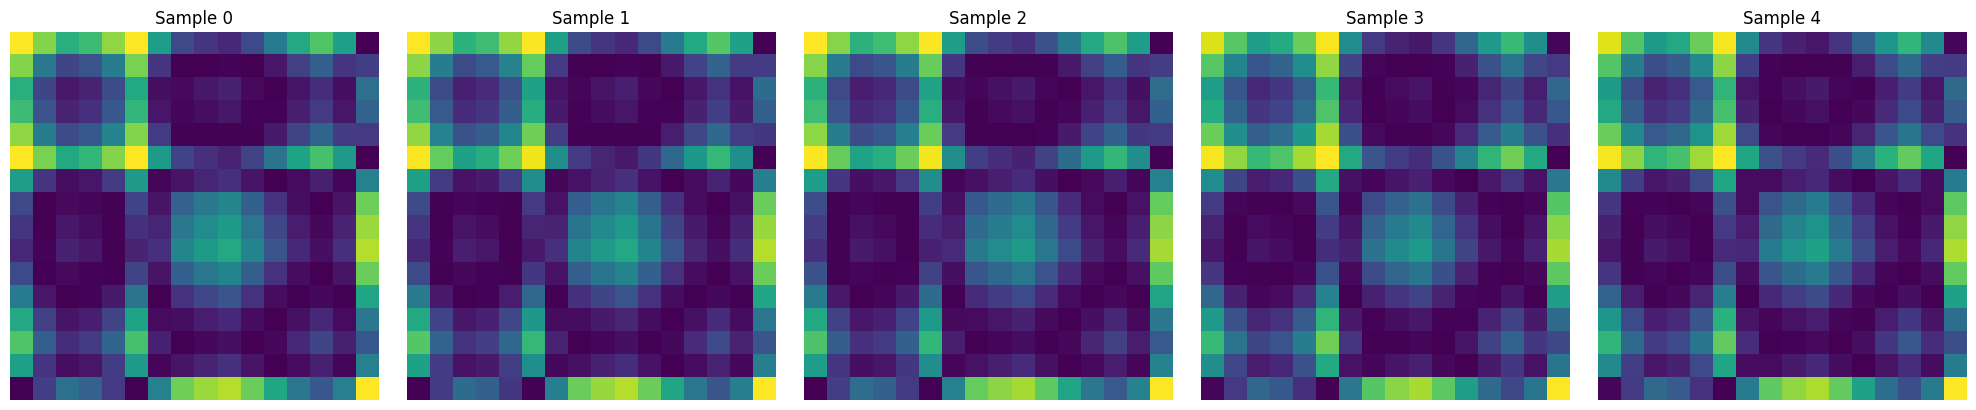

In [15]:
import matplotlib.pyplot as plt
import os
from PIL import Image

gasf_dir_moi = "GASF_test_16"
num_images_to_show = 5

# Get the list of image files
image_files = [f for f in os.listdir(gasf_dir_moi) if f.endswith('.png')]
image_files.sort() # Sort to ensure consistent order

# Display the first few images
fig, axs = plt.subplots(1, num_images_to_show, figsize=(20, 4))

for i in range(min(num_images_to_show, len(image_files))):
    img_path = os.path.join(gasf_dir_moi, image_files[i])
    img = Image.open(img_path)
    axs[i].imshow(img)
    axs[i].set_title(f"Sample {i}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

GASF 65 * 65

In [16]:
import os
from PIL import Image
import gc

# -------------------------------
# 1. Setup directories
# -------------------------------
input_dir = "GASF_test_16"
output_dir = "GASF_test_65x65"
os.makedirs(output_dir, exist_ok=True)

# -------------------------------
# 2. Resize images
# -------------------------------
target_size = (65, 65)

image_files = [f for f in os.listdir(input_dir) if f.endswith('.png')]
print(f"Found {len(image_files)} images to resize.")

for i, filename in enumerate(image_files):
    input_path = os.path.join(input_dir, filename)
    output_path = os.path.join(output_dir, filename)

    if os.path.exists(output_path):
        continue # Skip if already resized

    try:
        img = Image.open(input_path)
        img_resized = img.resize(target_size, Image.Resampling.LANCZOS)
        img_resized.save(output_path)
        img.close()
        img_resized.close()

        if (i + 1) % 100 == 0:
            print(f"Processed {i + 1}/{len(image_files)} images.")

    except Exception as e:
        print(f"Error processing {filename}: {e}")

    gc.collect()

print("Image resizing complete.")

Found 432 images to resize.
Processed 100/432 images.
Processed 200/432 images.
Processed 300/432 images.
Processed 400/432 images.
Image resizing complete.


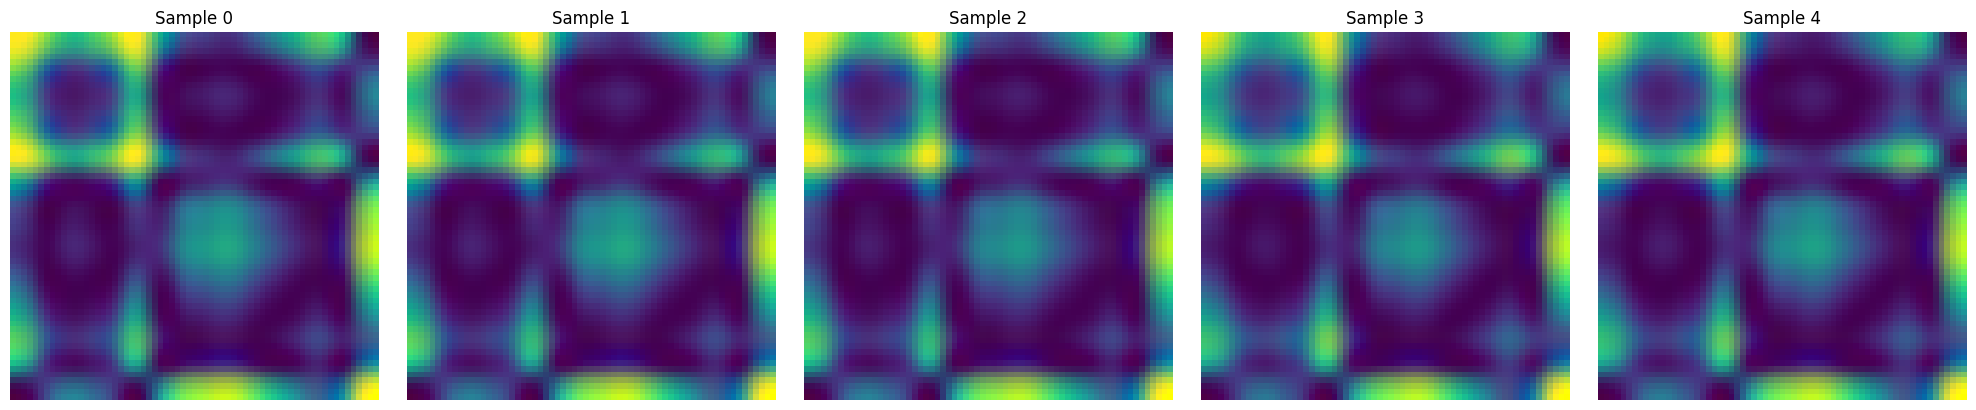

In [17]:
import matplotlib.pyplot as plt
import os
from PIL import Image

gasf_dir_test = "GASF_test_65x65"
num_images_to_show = 5

# Get the list of image files
image_files = [f for f in os.listdir(gasf_dir_test) if f.endswith('.png')]
image_files.sort() # Sort to ensure consistent order

# Display the first few images
fig, axs = plt.subplots(1, num_images_to_show, figsize=(20, 4))

for i in range(min(num_images_to_show, len(image_files))):
    img_path = os.path.join(gasf_dir_test, image_files[i])
    img = Image.open(img_path)
    axs[i].imshow(img)
    axs[i].set_title(f"Sample {i}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [18]:
import shutil
from google.colab import files

# ---------- Compress folders ----------
shutil.make_archive("GASF_test_16", 'zip', "GASF_test_16")
shutil.make_archive("GASF_test_65x65", 'zip', "GASF_test_65x65")

# ---------- Download ----------
files.download("GASF_test_16.zip")
files.download("GASF_test_65x65.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# GADF

In [6]:
import numpy as np
import os
from matplotlib import cm
from PIL import Image
import gc

# -------------------------------
# 1. Setup output directory
# -------------------------------
gadf_dir_moi = "GADF_test_16"
os.makedirs(gadf_dir_moi, exist_ok=True)

# -------------------------------
# 2. PAA - Piecewise Aggregate Approximation
# This reduces the length of the spectral sequence while
# preserving its main trends. The remainder (if the series
# cannot be divided exactly) is distributed across the first
# few segments.
# -------------------------------
def paa_distribute(series, segments):
    n = len(series)
    base = n // segments
    rem = n % segments
    res = []
    idx = 0
    for i in range(segments):
        seg_len = base + (1 if i < rem else 0)
        seg = series[idx: idx + seg_len]
        res.append(seg.mean())
        idx += seg_len
    return np.array(res)

# -------------------------------
# 3. GADF Transform
# Steps based on the paper:
#  a) Normalize PAA series to [0,1] first (for consistency across samples)
#  b) Convert normalized series to [-1,1] before arccos
#  c) Compute phi = arccos(scaled)
#  d) Compute GADF = sin(phi_i - phi_j)
# -------------------------------
def gadf_transform(paa_series):
    # Step a: normalize to [0,1]
    mn, mx = paa_series.min(), paa_series.max()
    if mx == mn:
        norm_01 = np.zeros_like(paa_series)
    else:
        norm_01 = (paa_series - mn) / (mx - mn)

    # Step b: convert to [-1,1] for arccos
    scaled = norm_01 * 2.0 - 1.0
    scaled = np.clip(scaled, -1, 1)  # ensure valid range for arccos

    # Step c: compute polar angles
    phi = np.arccos(scaled)

    # Step d: compute GADF matrix
    phi_sub = np.subtract.outer(phi, phi)
    gadf = np.sin(phi_sub)
    return gadf

# -------------------------------
# 4. Save matrix as image
# Values in GADF are in [-1,1], we scale to [0,1] for image
# colormap 'viridis' is applied for visualization
# -------------------------------
def save_matrix(mat, path):
    arr = (mat + 1) / 2  # scale [-1,1] → [0,1]
    rgba = cm.viridis(arr)
    rgb = (rgba[:, :, :3] * 255).astype(np.uint8)
    Image.fromarray(rgb).save(path)

# -------------------------------
# 5. Batch processing settings
# -------------------------------
segments = 16          # number of PAA segments
batch_size = 100       # number of samples per batch
num_samples = len(df)  # total number of spectra

# -------------------------------
# 6. Process dataset batch by batch
# -------------------------------
for batch_start in range(0, num_samples, batch_size):
    batch_end = min(batch_start + batch_size, num_samples)
    print(f"Processing GADF batch {batch_start} .. {batch_end-1}")

    for idx in range(batch_start, batch_end):
        gadf_path = os.path.join(gadf_dir_moi, f"sample_{idx}.png")
        if os.path.exists(gadf_path):
            continue  # skip if already processed

        # Load spectral data from df
        spectrum = df.iloc[idx].values.astype(float)

        # Step 2: Apply PAA
        paa_series = paa_distribute(spectrum, segments)

        # Step 3: Compute GADF
        gadf = gadf_transform(paa_series)

        # Step 4: Save GADF as image
        save_matrix(gadf, gadf_path)

        # Free memory
        del paa_series, gadf
        gc.collect()

    print(f"GADF batch {batch_start} to {batch_end-1} done ✅")

Processing GADF batch 0 .. 99
GADF batch 0 to 99 done ✅
Processing GADF batch 100 .. 199
GADF batch 100 to 199 done ✅
Processing GADF batch 200 .. 299
GADF batch 200 to 299 done ✅
Processing GADF batch 300 .. 399
GADF batch 300 to 399 done ✅
Processing GADF batch 400 .. 431
GADF batch 400 to 431 done ✅


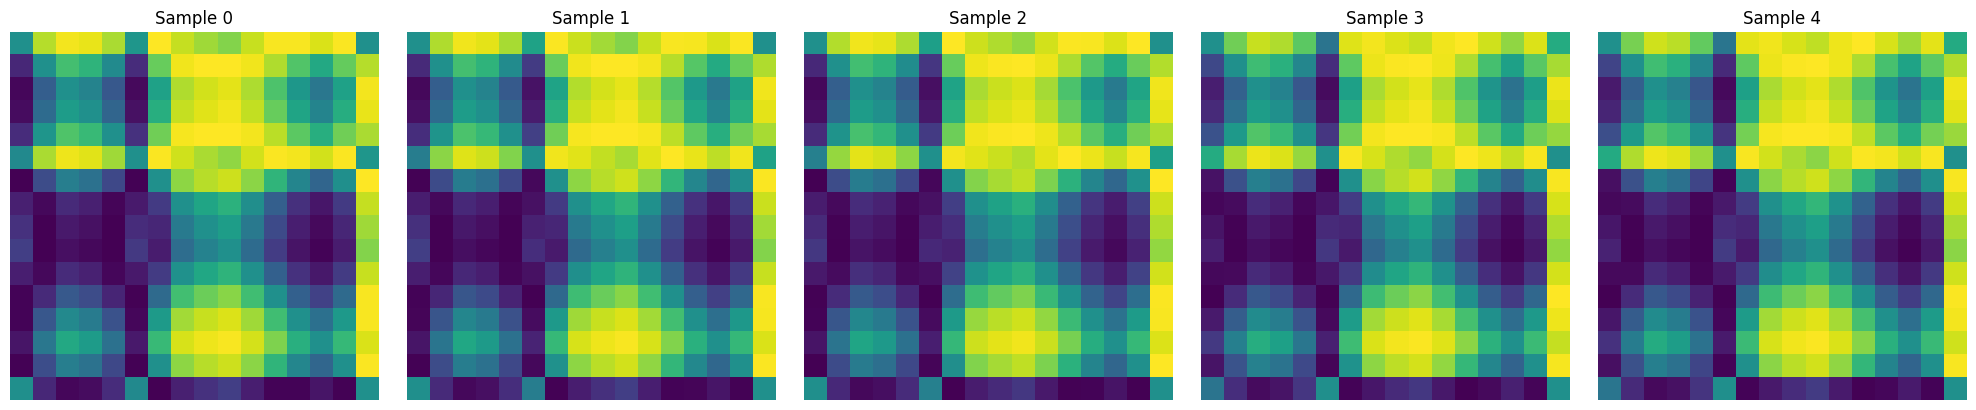

In [8]:
import matplotlib.pyplot as plt
import os
from PIL import Image

gasf_dir_moi = "GADF_test_16"
num_images_to_show = 5

# Get the list of image files
image_files = [f for f in os.listdir(gasf_dir_moi) if f.endswith('.png')]
image_files.sort() # Sort to ensure consistent order

# Display the first few images
fig, axs = plt.subplots(1, num_images_to_show, figsize=(20, 4))

for i in range(min(num_images_to_show, len(image_files))):
    img_path = os.path.join(gasf_dir_moi, image_files[i])
    img = Image.open(img_path)
    axs[i].imshow(img)
    axs[i].set_title(f"Sample {i}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [9]:
import os
from PIL import Image
import gc

# -------------------------------
# 1. Setup directories
# -------------------------------
input_dir = "GADF_test_16"
output_dir = "GADF_test_65x65"
os.makedirs(output_dir, exist_ok=True)

# -------------------------------
# 2. Resize images
# -------------------------------
target_size = (65, 65)

image_files = [f for f in os.listdir(input_dir) if f.endswith('.png')]
print(f"Found {len(image_files)} images to resize.")

for i, filename in enumerate(image_files):
    input_path = os.path.join(input_dir, filename)
    output_path = os.path.join(output_dir, filename)

    if os.path.exists(output_path):
        continue # Skip if already resized

    try:
        img = Image.open(input_path)
        img_resized = img.resize(target_size, Image.Resampling.LANCZOS)
        img_resized.save(output_path)
        img.close()
        img_resized.close()

        if (i + 1) % 100 == 0:
            print(f"Processed {i + 1}/{len(image_files)} images.")

    except Exception as e:
        print(f"Error processing {filename}: {e}")

    gc.collect()

print("Image resizing complete.")

Found 432 images to resize.
Processed 100/432 images.
Processed 200/432 images.
Processed 300/432 images.
Processed 400/432 images.
Image resizing complete.


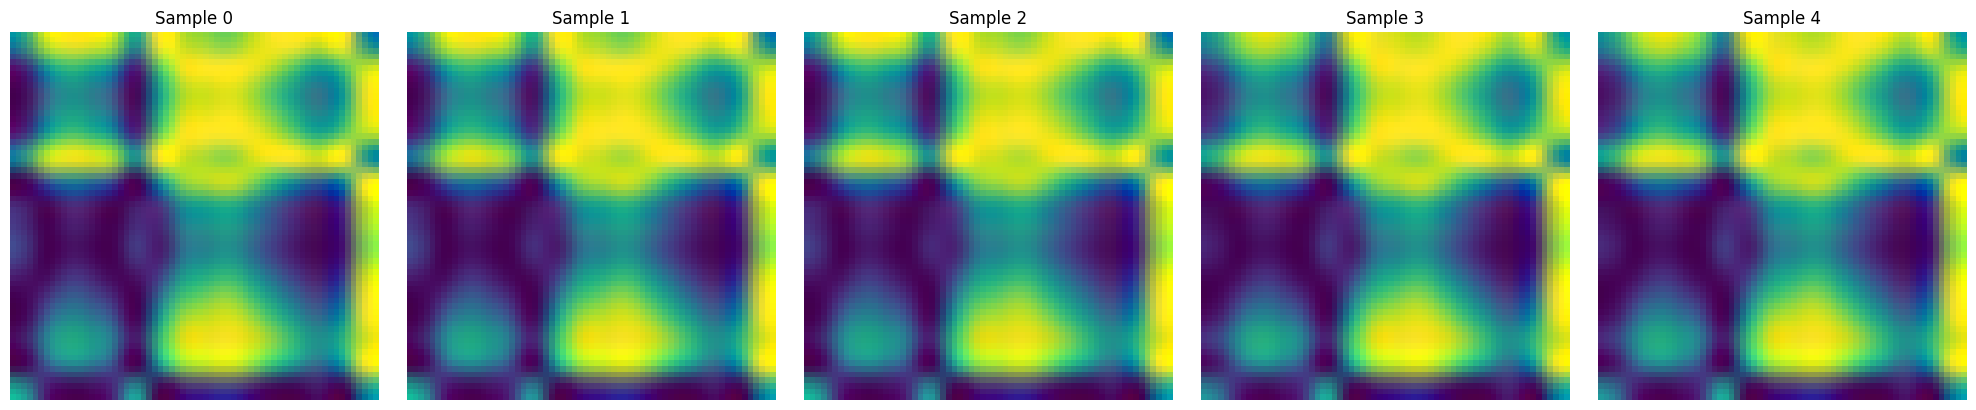

In [10]:
import matplotlib.pyplot as plt
import os
from PIL import Image

gasf_dir_moi = "GADF_test_65x65"
num_images_to_show = 5

# Get the list of image files
image_files = [f for f in os.listdir(gasf_dir_moi) if f.endswith('.png')]
image_files.sort() # Sort to ensure consistent order

# Display the first few images
fig, axs = plt.subplots(1, num_images_to_show, figsize=(20, 4))

for i in range(min(num_images_to_show, len(image_files))):
    img_path = os.path.join(gasf_dir_moi, image_files[i])
    img = Image.open(img_path)
    axs[i].imshow(img)
    axs[i].set_title(f"Sample {i}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import shutil
from google.colab import files

# ---------- Compress folders ----------
shutil.make_archive("GADF_test_16", 'zip', "GADF_test_16")
shutil.make_archive("GADF_test_65x65", 'zip', "GADF_test_65x65")

# ---------- Download ----------
files.download("GADF_test_16.zip")
files.download("GADF_test_65x65.zip")

# **LUCAS Dataset**

In [ ]:
file_path = '/content/drive/MyDrive/LUCAS.SOIL_corr.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(file_path)

df.head()

/tmp/ipython-input-3672932280.py:3: DtypeWarning: Columns (1,2,4216,4231,4234,4237,4274) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Unnamed: 0,sample.ID,ID,date,spc.400,spc.400.5,spc.401,spc.401.5,spc.402,spc.402.5,...,WRBLV1,WRBADJ1,PARMADO1,PARMADO2,PARMADO3,PARMASE1,PARMASE2,PARMASE3,MIN_TOP,mineral
0,4,100,100,2011-01-24 16:02:25,0.831705,0.839111,0.846473,0.853773,0.860988,0.868098,...,CM,dy,3.0,31.0,310.0,5.0,56.0,561.0,KQ,mineral
1,5,1000,1000,2010-09-30 14:50:01,0.706027,0.714901,0.723727,0.732480,0.741142,0.749684,...,CM,dy,3.0,31.0,311.0,3.0,31.0,310.0,KQ,mineral
2,6,10000,10000,2010-10-19 12:06:16,0.666238,0.676472,0.686654,0.696757,0.706753,0.716615,...,CM,ca,2.0,21.0,214.0,0.0,0.0,0.0,MS,mineral
3,7,10001,10001,2010-10-19 15:00:01,0.698136,0.706548,0.714909,0.723197,0.731384,0.739448,...,CM,dy,3.0,31.0,310.0,4.0,42.0,420.0,KQ,mineral
4,8,10002,10002,2011-04-30 12:26:27,0.675433,0.684820,0.694163,0.703438,0.712620,0.721693,...,LV,ha,7.0,71.0,710.0,6.0,62.0,620.0,M,mineral


# **Sample Review**

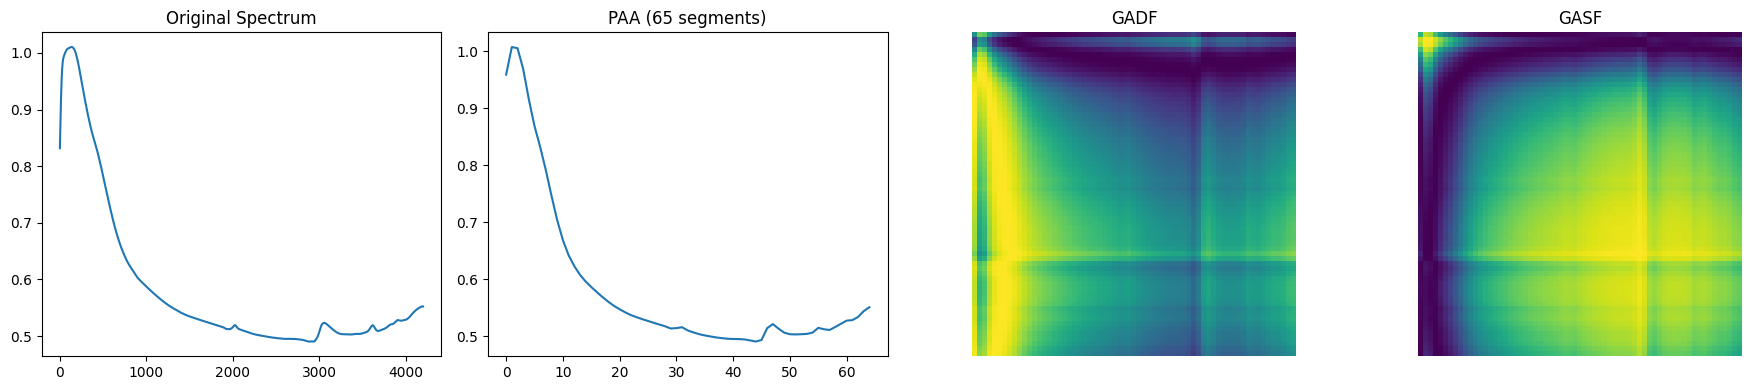

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def paa_distribute(series, segments):
    n = len(series)
    base = n // segments
    rem = n % segments
    res = []
    idx = 0
    for i in range(segments):
        seg_len = base + (1 if i < rem else 0)
        seg = series[idx: idx+seg_len]
        res.append(seg.mean())
        idx += seg_len
    return np.array(res)

# ---------- GADF ----------
def gadf_transform(paa_series):
    # 1️⃣ Normalize to [0,1]
    mn, mx = paa_series.min(), paa_series.max()
    if mx == mn:
        scaled_01 = np.zeros_like(paa_series)
    else:
        scaled_01 = (paa_series - mn) / (mx - mn)

    # 2️⃣ Convert to [-1,1]
    scaled = 2.0 * scaled_01 - 1.0
    scaled = np.clip(scaled, -1.0, 1.0)

    # 3️⃣ Compute angles and GADF
    phi = np.arccos(scaled)
    phi_sub = np.subtract.outer(phi, phi)
    GADF = np.sin(phi_sub)
    return GADF

# ---------- GASF ----------
def gasf_transform(paa_series):
    # 1️⃣ Normalize to [0,1]
    mn, mx = paa_series.min(), paa_series.max()
    if mx == mn:
        scaled_01 = np.zeros_like(paa_series)
    else:
        scaled_01 = (paa_series - mn) / (mx - mn)

    # 2️⃣ Convert to [-1,1]
    scaled = 2.0 * scaled_01 - 1.0
    scaled = np.clip(scaled, -1.0, 1.0)

    # 3️⃣ Compute angles and GASF
    phi = np.arccos(scaled)
    phi_add = np.add.outer(phi, phi)
    GASF = np.cos(phi_add)
    return GASF

segments = 65

row = df.iloc[0]
spectrum = row.filter(like="spc.").values.astype(float)

# PAA
paa_series = paa_distribute(spectrum, segments)

# GADF و GASF
gadf = gadf_transform(paa_series)
gasf = gasf_transform(paa_series)

fig, axs = plt.subplots(1, 4, figsize=(18, 4))

axs[0].plot(spectrum)
axs[0].set_title("Original Spectrum")

axs[1].plot(paa_series)
axs[1].set_title(f"PAA ({segments} segments)")

# GADF
im2 = axs[2].imshow(gadf, cmap="viridis", origin="upper", vmin=-1, vmax=1)
axs[2].set_title("GADF")
axs[2].axis("off")

# GASF
im3 = axs[3].imshow(gasf, cmap="viridis", origin="upper", vmin=-1, vmax=1)
axs[3].set_title("GASF")
axs[3].axis("off")

plt.tight_layout()
plt.show()

# **Sample Review with polar plot**

In [ ]:
!pip install pyts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 35.4 MB/s eta 0:00:00


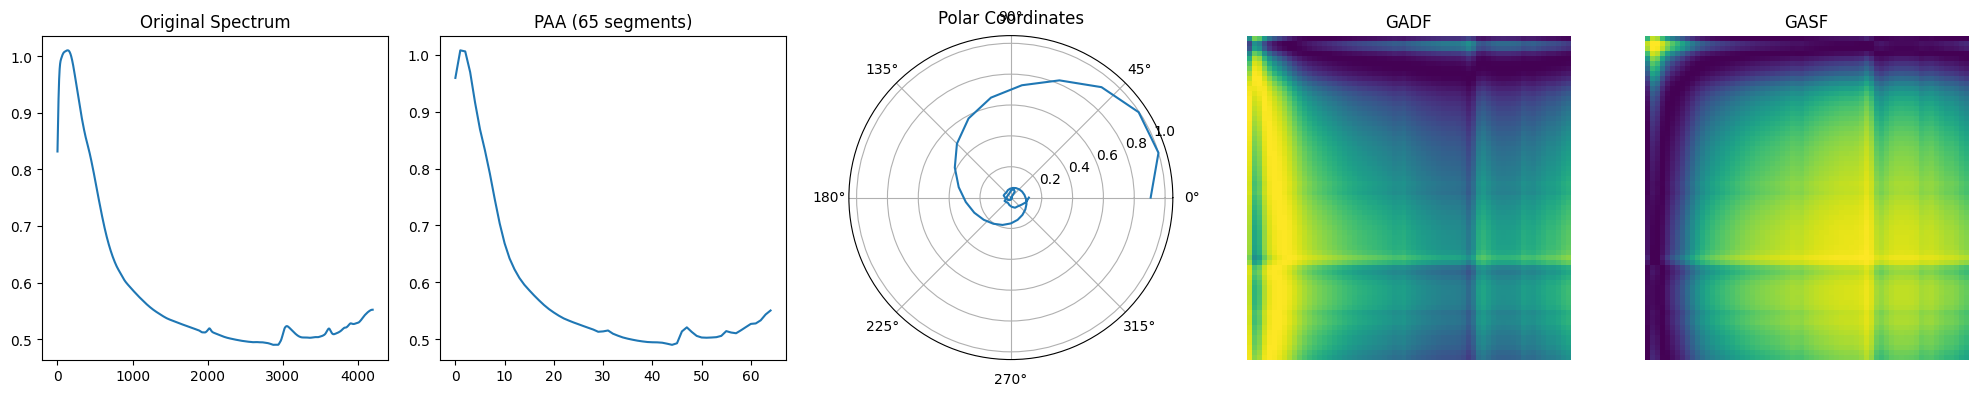

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def paa_distribute(series, segments):
    n = len(series)
    base = n // segments
    rem = n % segments
    res = []
    idx = 0
    for i in range(segments):
        seg_len = base + (1 if i < rem else 0)
        seg = series[idx: idx+seg_len]
        res.append(seg.mean())
        idx += seg_len
    return np.array(res)

# ---------- GADF ----------
def gadf_transform(paa_series):
    mn, mx = paa_series.min(), paa_series.max()
    if mx == mn:
        scaled = np.zeros_like(paa_series)
    else:
        scaled = 2.0 * (paa_series - mn) / (mx - mn) - 1.0
    scaled = np.clip(scaled, -1.0, 1.0)
    phi = np.arccos(scaled)
    phi_sub = np.subtract.outer(phi, phi)
    GADF = np.sin(phi_sub)
    return GADF

# ---------- GASF ----------
def gasf_transform(paa_series):
    mn, mx = paa_series.min(), paa_series.max()
    if mx == mn:
        scaled = np.zeros_like(paa_series)
    else:
        scaled = 2.0 * (paa_series - mn) / (mx - mn) - 1.0
    scaled = np.clip(scaled, -1.0, 1.0)
    phi = np.arccos(scaled)
    phi_add = np.add.outer(phi, phi)
    GASF = np.cos(phi_add)
    return GASF

# ---------- إعداد ----------
segments = 65

# أول sample
row = df.iloc[0]
spectrum = row.filter(like="spc.").values.astype(float)

# PAA
paa_series = paa_distribute(spectrum, segments)

# Normalize PAA for polar plot
scaled_paa = (paa_series - paa_series.min()) / (paa_series.max() - paa_series.min())

# GADF و GASF
gadf = gadf_transform(paa_series)
gasf = gasf_transform(paa_series)

fig = plt.figure(figsize=(20, 4))

ax0 = fig.add_subplot(1, 5, 1)
ax0.plot(spectrum)
ax0.set_title("Original Spectrum")

ax1 = fig.add_subplot(1, 5, 2)
ax1.plot(paa_series)
ax1.set_title(f"PAA ({segments} segments)")

# 3. Polar Plot (Spiral Style)
theta = np.linspace(0, 6 * np.pi, len(scaled_paa))  # spiral loops
r = scaled_paa
ax2 = fig.add_subplot(1, 5, 3, projection='polar')
ax2.plot(theta, r)
ax2.set_title("Polar Coordinates", va='bottom')
ax2.grid(True)

# 4. GADF
ax3 = fig.add_subplot(1, 5, 4)
ax3.imshow(gadf, cmap="viridis", origin="upper", vmin=-1, vmax=1)
ax3.set_title("GADF")
ax3.axis("off")

# 5. GASF
ax4 = fig.add_subplot(1, 5, 5)
ax4.imshow(gasf, cmap="viridis", origin="upper", vmin=-1, vmax=1)
ax4.set_title("GASF")
ax4.axis("off")

plt.tight_layout()
plt.show()

#**GASF**

In [ ]:
import numpy as np
import os
from matplotlib import cm
from PIL import Image
import gc

# -------------------------------
# 1. Setup output directory
# -------------------------------
gasf_dir = "GASF_images"
os.makedirs(gasf_dir, exist_ok=True)

# -------------------------------
# 2. PAA - Piecewise Aggregate Approximation
# This reduces the length of the spectral sequence while
# preserving its main trends. The remainder (if the series
# cannot be divided exactly) is distributed across the first
# few segments.
# -------------------------------
def paa_distribute(series, segments):
    n = len(series)
    base = n // segments
    rem = n % segments
    res = []
    idx = 0
    for i in range(segments):
        seg_len = base + (1 if i < rem else 0)
        seg = series[idx: idx + seg_len]
        res.append(seg.mean())
        idx += seg_len
    return np.array(res)

# -------------------------------
# 3. GASF Transform
# Steps based on the paper:
#  a) Normalize PAA series to [0,1] first (for consistency across samples)
#  b) Convert normalized series to [-1,1] before arccos
#  c) Compute phi = arccos(scaled)
#  d) Compute GASF = cos(phi_i + phi_j)
# -------------------------------
def gasf_transform(paa_series):
    # Step a: normalize to [0,1]
    mn, mx = paa_series.min(), paa_series.max()
    if mx == mn:
        norm_01 = np.zeros_like(paa_series)
    else:
        norm_01 = (paa_series - mn) / (mx - mn)

    # Step b: convert to [-1,1] for arccos
    scaled = norm_01 * 2.0 - 1.0
    scaled = np.clip(scaled, -1, 1)  # ensure valid range for arccos

    # Step c: compute polar angles
    phi = np.arccos(scaled)

    # Step d: compute GASF matrix
    phi_sum = np.add.outer(phi, phi)
    gasf = np.cos(phi_sum)
    return gasf

# -------------------------------
# 4. Save matrix as image
# Values in GASF are in [-1,1], we scale to [0,1] for image
# colormap 'viridis' is applied for visualization
# -------------------------------
def save_matrix(mat, path):
    arr = (mat + 1) / 2  # scale [-1,1] → [0,1]
    rgba = cm.viridis(arr)
    rgb = (rgba[:, :, :3] * 255).astype(np.uint8)
    Image.fromarray(rgb).save(path)

# -------------------------------
# 5. Batch processing settings
# -------------------------------
segments = 65          # number of PAA segments
batch_size = 200       # number of samples per batch
num_samples = len(df)  # total number of spectra

# -------------------------------
# 6. Process dataset batch by batch
# -------------------------------
for batch_start in range(0, num_samples, batch_size):
    batch_end = min(batch_start + batch_size, num_samples)
    print(f"Processing GASF batch {batch_start} .. {batch_end-1}")

    for idx in range(batch_start, batch_end):
        gasf_path = os.path.join(gasf_dir, f"sample_{idx}.png")
        if os.path.exists(gasf_path):
            continue  # skip if already processed

        # Load spectral data
        spectrum = df.iloc[idx].filter(like="spc.").values.astype(float)

        # Step 2: Apply PAA
        paa_series = paa_distribute(spectrum, segments)

        # Step 3: Compute GASF
        gasf = gasf_transform(paa_series)

        # Step 4: Save GASF as image
        save_matrix(gasf, gasf_path)

        # Free memory
        del paa_series, gasf
        gc.collect()

    print(f"GASF batch {batch_start} to {batch_end-1} done ✅")

Processing GASF batch 0 .. 199
GASF batch 0 to 199 done ✅
Processing GASF batch 200 .. 399
GASF batch 200 to 399 done ✅
Processing GASF batch 400 .. 599
GASF batch 400 to 599 done ✅
Processing GASF batch 600 .. 799
GASF batch 600 to 799 done ✅
Processing GASF batch 800 .. 999
GASF batch 800 to 999 done ✅
Processing GASF batch 1000 .. 1199
GASF batch 1000 to 1199 done ✅
Processing GASF batch 1200 .. 1399
GASF batch 1200 to 1399 done ✅
Processing GASF batch 1400 .. 1599
GASF batch 1400 to 1599 done ✅
Processing GASF batch 1600 .. 1799
GASF batch 1600 to 1799 done ✅
Processing GASF batch 1800 .. 1999
GASF batch 1800 to 1999 done ✅
Processing GASF batch 2000 .. 2199
GASF batch 2000 to 2199 done ✅
Processing GASF batch 2200 .. 2399
GASF batch 2200 to 2399 done ✅
Processing GASF batch 2400 .. 2599
GASF batch 2400 to 2599 done ✅
Processing GASF batch 2600 .. 2799
GASF batch 2600 to 2799 done ✅
Processing GASF batch 2800 .. 2999
GASF batch 2800 to 2999 done ✅
Processing GASF batch 3000 .. 3199

# **GADF**

In [ ]:
gadf_dir = "GADF_images"
os.makedirs(gadf_dir, exist_ok=True)

def paa_distribute(series, segments):
    n = len(series)
    base = n // segments
    rem = n % segments
    res = []
    idx = 0
    for i in range(segments):
        seg_len = base + (1 if i < rem else 0)
        seg = series[idx: idx+seg_len]
        res.append(seg.mean())
        idx += seg_len
    return np.array(res)

# ------ GADF ------
def gadf_transform(paa_series):
    mn, mx = paa_series.min(), paa_series.max()
    if mx == mn:
        scaled = np.zeros_like(paa_series)
    else:
        scaled = 2.0 * (paa_series - mn) / (mx - mn) - 1.0
    scaled = np.clip(scaled, -1, 1)
    phi = np.arccos(scaled)
    phi_sub = np.subtract.outer(phi, phi)
    return np.sin(phi_sub)

def save_matrix(mat, path):
    arr = (mat + 1) / 2  # normalize to 0-1 for image
    rgba = cm.viridis(arr)
    rgb = (rgba[:, :, :3] * 255).astype(np.uint8)
    Image.fromarray(rgb).save(path)

segments = 65
batch_size = 500
num_samples = len(df)

for batch_start in range(0, num_samples, batch_size):
    batch_end = min(batch_start + batch_size, num_samples)
    print(f"Processing GADF batch {batch_start} .. {batch_end-1}")
    for idx in range(batch_start, batch_end):
        gadf_path = os.path.join(gadf_dir, f"sample_{idx}.png")
        if os.path.exists(gadf_path):
            continue
        spectrum = df.iloc[idx].filter(like="spc.").values.astype(float)
        paa_series = paa_distribute(spectrum, segments)
        gadf = gadf_transform(paa_series)
        save_matrix(gadf, gadf_path)
        del paa_series, gadf
        gc.collect()
    print(f"GADF batch {batch_start} to {batch_end-1} done ✅")


Processing GADF batch 0 .. 499
GADF batch 0 to 499 done ✅
Processing GADF batch 500 .. 999
GADF batch 500 to 999 done ✅
Processing GADF batch 1000 .. 1499
GADF batch 1000 to 1499 done ✅
Processing GADF batch 1500 .. 1999
GADF batch 1500 to 1999 done ✅
Processing GADF batch 2000 .. 2499
GADF batch 2000 to 2499 done ✅
Processing GADF batch 2500 .. 2999
GADF batch 2500 to 2999 done ✅
Processing GADF batch 3000 .. 3499
GADF batch 3000 to 3499 done ✅
Processing GADF batch 3500 .. 3999
GADF batch 3500 to 3999 done ✅
Processing GADF batch 4000 .. 4499
GADF batch 4000 to 4499 done ✅
Processing GADF batch 4500 .. 4999
GADF batch 4500 to 4999 done ✅
Processing GADF batch 5000 .. 5499
GADF batch 5000 to 5499 done ✅
Processing GADF batch 5500 .. 5999
GADF batch 5500 to 5999 done ✅
Processing GADF batch 6000 .. 6499
GADF batch 6000 to 6499 done ✅
Processing GADF batch 6500 .. 6999
GADF batch 6500 to 6999 done ✅
Processing GADF batch 7000 .. 7499
GADF batch 7000 to 7499 done ✅
Processing GADF batch 

In [ ]:
import shutil
from google.colab import files

# ---------- Compress folders ----------
shutil.make_archive("GASF_images", 'zip', "GASF_images")
shutil.make_archive("GADF_images", 'zip', "GADF_images")

# ---------- Download ----------
files.download("GASF_images.zip")
files.download("GADF_images.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>